In [1]:
 import sys 
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns


In [2]:
data=pd.read_csv("F:/creditcard.csv")

In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [7]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [8]:
data=data.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


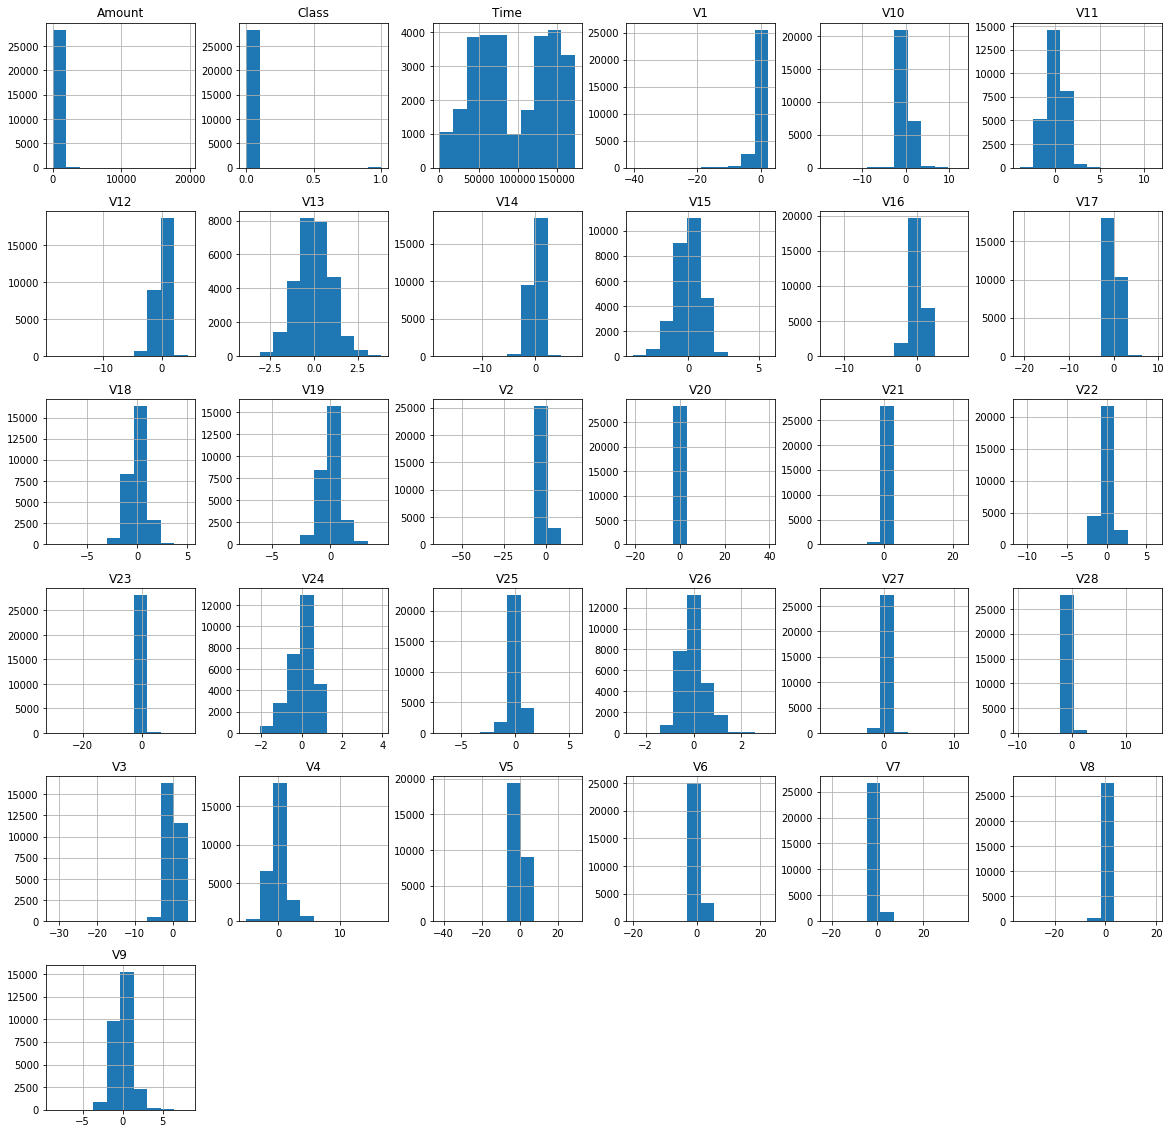

In [9]:
data.hist(figsize=(20,20))
plt.show()

In [11]:
Fraud=data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases:{}',format(len(Fraud)))
print('Valid Cases:{}',format(len(Valid)))


0.0017234102419808666
Fraud Cases:{} 49
Valid Cases:{} 28432


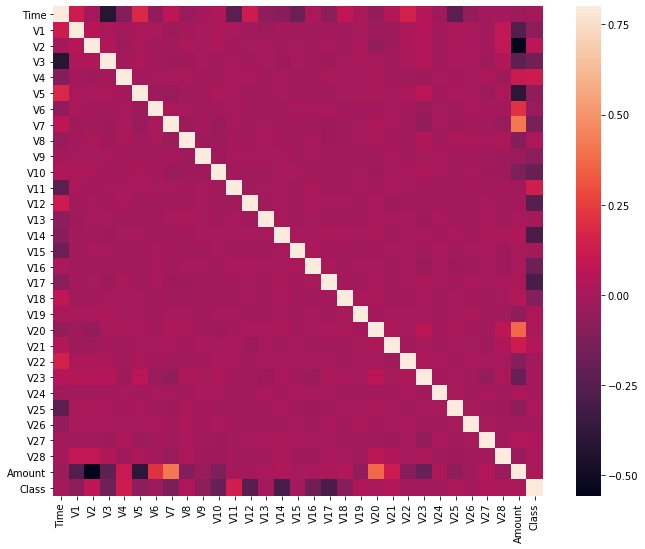

In [14]:
corrmat=data.corr()
fig=plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [34]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target = "Class"
X=data[columns]
Y=data[target]
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [35]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest

In [36]:
from sklearn.neighbors import LocalOutlierFactor

In [37]:
state =1
classifiers = {
    "Isolation Forest":IsolationForest(max_samples = len(x),contamination = outlier_fraction,random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [1]:
 n_outliers = len(Fraud)
 for i,(clf_name,clf) in enumerate(classifiers.items()):
     if clf_name =="Local Outlier Factor":
         y_pred = clf.negative_outlier_factor_
    else:
         clf.fit(x)
         scores_pred = clf.decision_function(x)
         y_pred = clf.predict(x)
        
        
        #0 for valid and 1 for fraud
    y_pred[y_pred==1] = 0
     y_pred[y_pred==-1]= 1
    
     n_errors = (y_pred != Y).sum()
    
     print('{}:{}'.format(clf_name,n_errors))
     print(accuracy_score(Y,y_pred))
     print(classification_report(Y,y_pred))